# Домашнее задание по статистическому анализу на python

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import pearsonr

Загрузить датасет по url:


In [128]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [129]:
df[:5]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [130]:
#Выброс
df.loc[df['Freedom'].isnull(), :]
#df.loc[df['Country (region)'] == 'Qatar', :]
df = df[df['Country (region)'] != 'Qatar']

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

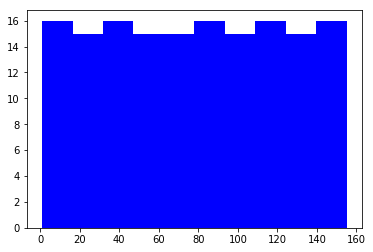

In [132]:
#Равномерное распределение
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='b')

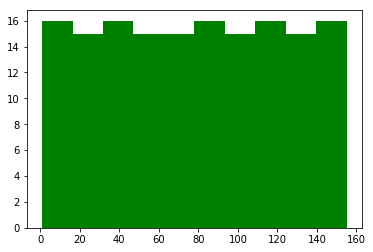

In [133]:
#Равномерное распределение
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [70]:
'Медиана равна {}'.format(statistics.median(df['Freedom']))

'Медиана равна 78.0'

In [94]:
#Нет повторяющихся значений. 
#Так как каждое значение выборки повторяется одинаковое число раз => равномерное распределение колонки Freedom.
#Получается, что мода - любое число из выборки.
'Мода равна {}'.format(statistics.mode(df['Freedom'])) 

In [72]:
'Математическое ожидание равно {}'.format(statistics.mean(df['Freedom']))

'Математическое ожидание равно 78.0'

In [73]:
'Стандартное отклонение равно {}'.format(statistics.pstdev(df['Freedom']))


'Стандартное отклонение равно 44.74371464239419'

In [74]:
'Дисперсия равна {}'.format(statistics.pvariance(df['Freedom']))


'Дисперсия равна 2002.0'

In [75]:
'Минимум равен {}'.format(min(df['Freedom']))

'Минимум равен 1.0'

In [76]:
'Максимум равен {}'.format(max(df['Freedom']))

'Максимум равен 155.0'

In [92]:
'Размах {}'.format(max(df['Freedom']) - min(df['Freedom']))

'Размах 154.0'

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

'Коэффициент корреляции Пирсона = 0.6817698430601656'

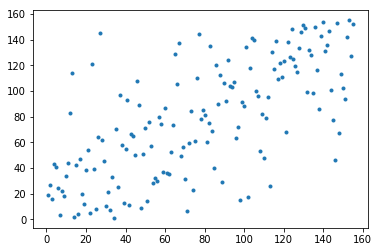

In [99]:
#Коэффициент корреляции говорит о наличии линейной связи между этими случайными величинами. О степени связи 
x = df['Freedom']
y = df['Positive affect']
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
'Коэффициент корреляции Пирсона = {}'.format(corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [114]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

duration_2 = min_max_scaler.fit_transform(np.array(df['Freedom']).reshape(-1, 1))
df_normalized = pd.DataFrame(duration_2)
df_normalized.head()

,0
0,-0.948052
1,-0.935065
2,-0.974026
3,-0.922078
4,-0.766234


Построить матрицу корреляций для всех колонок таблицы

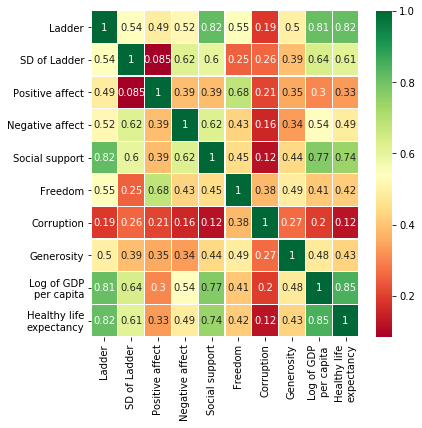

In [107]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Загрузить следующую таблицу: 

In [136]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

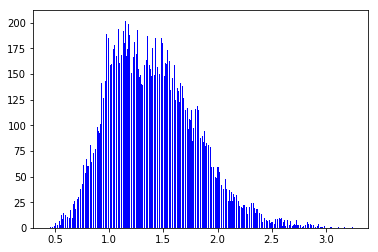

In [137]:
#Из гистограммы видно, что это нормальное распределение
n, bins, patches = plt.hist(df['AveragePrice'], 400, facecolor='b')

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

Коэффициент корреляции Пирсона: -0.20831704848788477


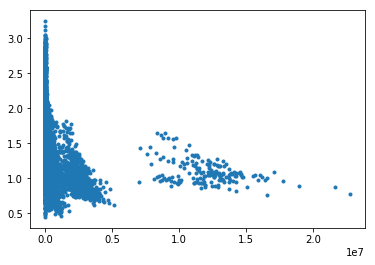

In [140]:
x = df['4046']
y = df['AveragePrice']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)